## CIFAR-10 with Dense layers

In [1]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
#Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
#shapes of traning and testing 
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


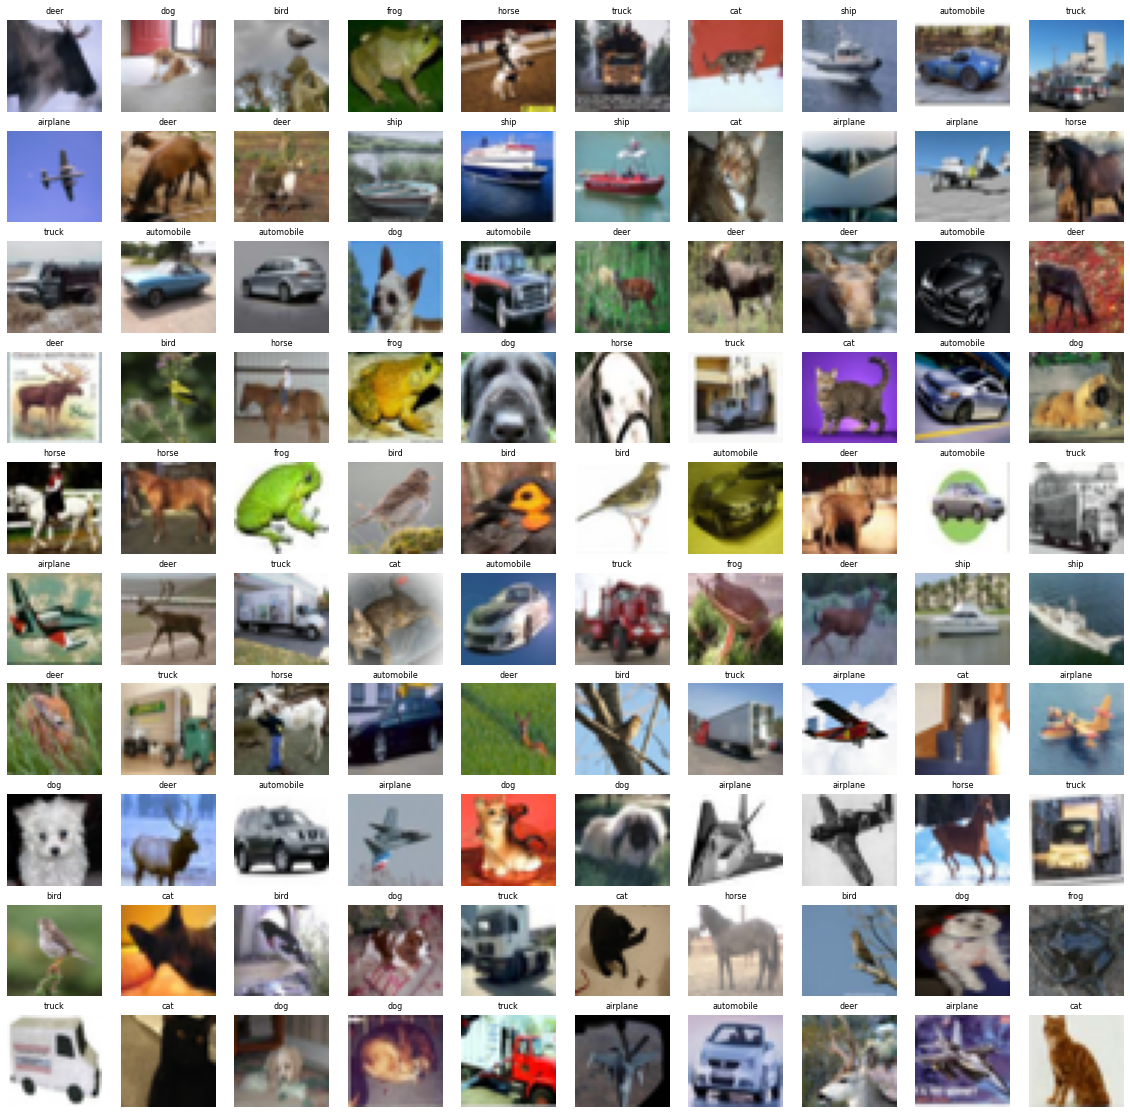

In [4]:
#visualization of data 
# Define the labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10
#axes to plot figures at various locations          
fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))
#flatten
axes = axes.ravel() 
#the length of the train dataset
n_train = len(X_train) 
# Select a random number from n_train
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
#read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')


In [5]:
#Normalize Data
X_train = X_train.reshape((50000 , 32 * 32 * 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000 , 32 * 32 *3 ))
X_test = X_test.astype('float32') / 255


train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [6]:
#Model Building
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 * 3,)))
model.add(layers.Dense(256, activation='relu', name='Layer_2'))
model.add(layers.Dense(128, activation='relu', name='Layer_3'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
history = model.fit(X_train, train_labels, epochs=50, batch_size=20)

Epoch 1/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.8215 - accuracy: 0.3459
Epoch 2/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.6312 - accuracy: 0.4190
Epoch 3/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.5496 - accuracy: 0.4471
Epoch 4/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4939 - accuracy: 0.4659
Epoch 5/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4491 - accuracy: 0.4811
Epoch 6/50
2500/2500 [==============================] - 29s 12ms/step - loss: 1.4049 - accuracy: 0.4993
Epoch 7/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.3648 - accuracy: 0.5147
Epoch 8/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.3327 - accuracy: 0.5263
Epoch 9/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.2989 - accuracy: 0.5404
Epoch 10/50
2500/2500 [==============================] - 30s 12m

In [10]:
model.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.8666 - accuracy: 0.5432


[1.8665685653686523, 0.5432000160217285]